---
title: "`Autogluon`과 여러가지 유형의 데이터"
author: "강신성"
date: "2023-12-04"
categories: [autogluon]
---




> `autogluon`을 이용하여 다양한 유형의 데이터들을 적합해보자!

## 1. 라이브러리 imports

In [1]:
#!pip install autogluon.eda

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
import sklearn.model_selection
from autogluon.tabular import TabularPredictor
#pip install autogluon.eda
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

## 2. 결측치와 타입별 교호작용이 있는 데이터

### **A. 데이터 EDA**
---




In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_test.csv')

In [4]:
df_train.head()

,weight,sex,height
0,71.169041,male,180.906857
1,69.204748,male,178.123281
2,49.037293,female,165.106085
3,74.472874,male,177.467439
4,74.239599,male,177.439925


<AxesSubplot: xlabel='weight', ylabel='height'>

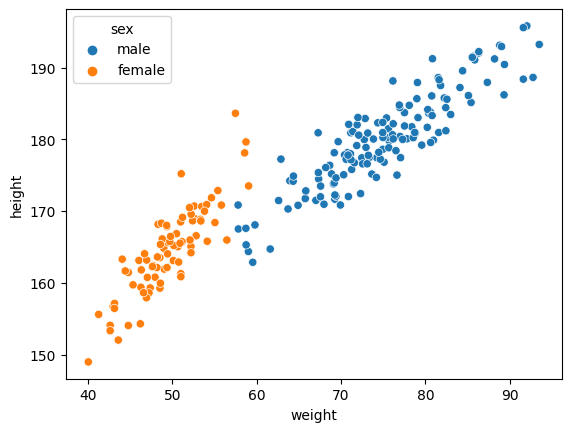

In [5]:
sns.scatterplot(df_train, x = 'weight', y = 'height', hue = 'sex')

* 성별 간 교호작용 존재
* 결측치 존재(성별 별로 결측치 처리)

### **B. 적합**
---




In [6]:
## step 1 -- pass(!)
## step 2 : create predictor
predictr = TabularPredictor(label = 'height')
## step 3 : fitting
predictr.fit(df_train)
## step 4 : prediction
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231219_132437"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231219_132437"
AutoGluon Version:  1.0.0
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   952.35 GB / 1887.51 GB (50.5%)
Train Data Rows:    280
Train Data Columns: 2
Label Column: height
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (195.79716947992372, 148.97529810482766, 174.60543, 9.4301)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLP

[1000]	valid_set's rmse: 3.05149


	-3.0349	 = Validation score   (-root_mean_squared_error)
	6.83s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ...
	-3.1331	 = Validation score   (-root_mean_squared_error)
	2.96s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-3.0811	 = Validation score   (-root_mean_squared_error)
	0.51s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	-2.8341	 = Validation score   (-root_mean_squared_error)
	0.66s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-3.0481	 = Validation score   (-root_mean_squared_error)
	0.49s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-3.0808	 = Validation score   (-root_mean_squared_error)
	17.51s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: XGBoost ...
	-3.0563	 = Validation score   (-root_mean_squared_error)
	0.35s	 = Training   runtime
	0.0s	 = Validation runtime
Fit

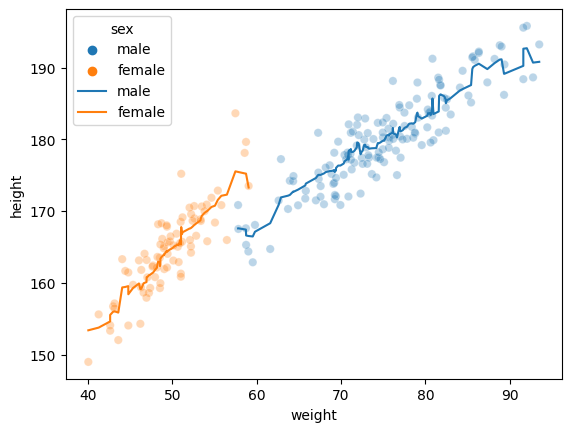

In [7]:
sns.scatterplot(df_train, x = 'weight', y = 'height', hue = 'sex', alpha = 0.3)
sns.lineplot(df_train, x = 'weight', y = yhat, hue = 'sex')
plt.show()

> 별다른 처리작업 없이도 나름 잘 적합한다.

In [8]:
predictr.leaderboard(silent = True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-2.725899,root_mean_squared_error,0.110847,30.585216,0.000378,0.420683,2,True,12
1,CatBoost,-2.834127,root_mean_squared_error,0.001400,0.661472,0.001400,0.661472,1,True,6
2,NeuralNetTorch,-2.859244,root_mean_squared_error,0.004692,11.629441,0.004692,11.629441,1,True,10
3,LightGBMXT,-3.034869,root_mean_squared_error,0.013989,6.832798,0.013989,6.832798,1,True,3
4,ExtraTreesMSE,-3.048093,root_mean_squared_error,0.058050,0.494194,0.058050,0.494194,1,True,7
5,XGBoost,-3.056270,root_mean_squared_error,0.002413,0.353153,0.002413,0.353153,1,True,9
6,NeuralNetFastAI,-3.080800,root_mean_squared_error,0.072954,17.514938,0.072954,17.514938,1,True,8
7,RandomForestMSE,-3.081138,root_mean_squared_error,0.051763,0.507366,0.051763,0.507366,1,True,5
8,LightGBM,-3.133082,root_mean_squared_error,0.006667,2.963136,0.006667,2.963136,1,True,4
9,LightGBMLarge,-3.175914,root_mean_squared_error,0.011894,206.395411,0.011894,206.395411,1,True,11


> `WeightEnsemble_L2`라는 모델로 적합한 것을 알 수 있습니당...

### **C. 해석 및 시각화**
---




`-` 반응변수에 대한 분석(교수님은 비추)

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
height,280,174.605431,9.430102,148.975298,167.572671,175.186487,181.132612,195.797169,float64,280,,,float,


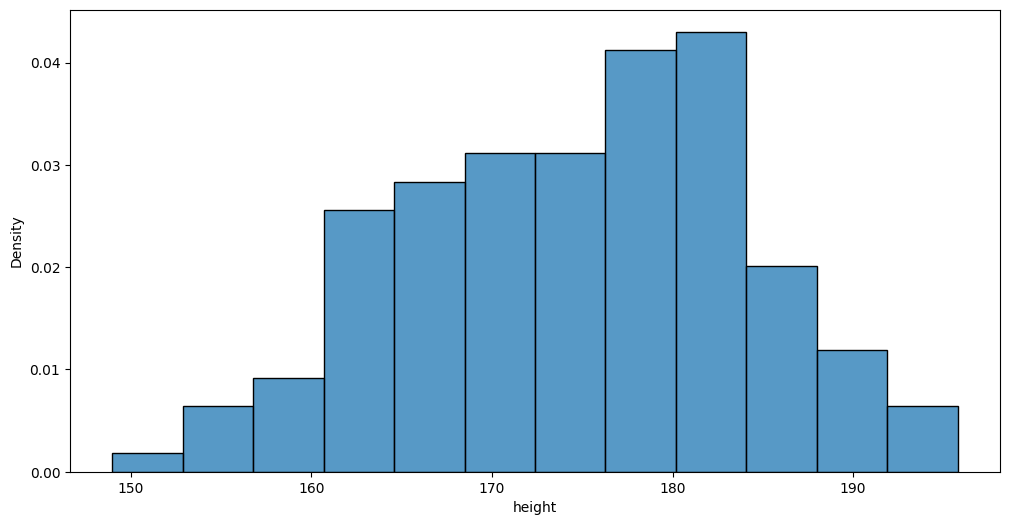

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `height` >= `0.5`**

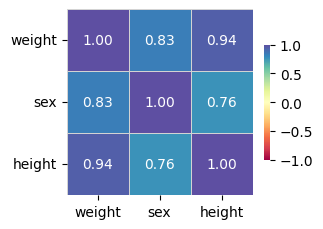

**Feature interaction between `weight`/`height` in `train_data`**

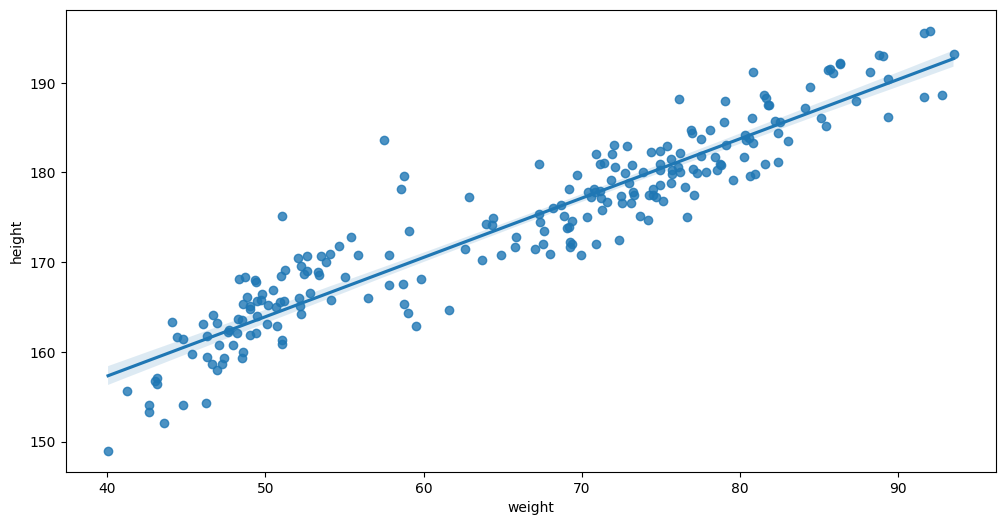

**Feature interaction between `sex`/`height` in `train_data`**

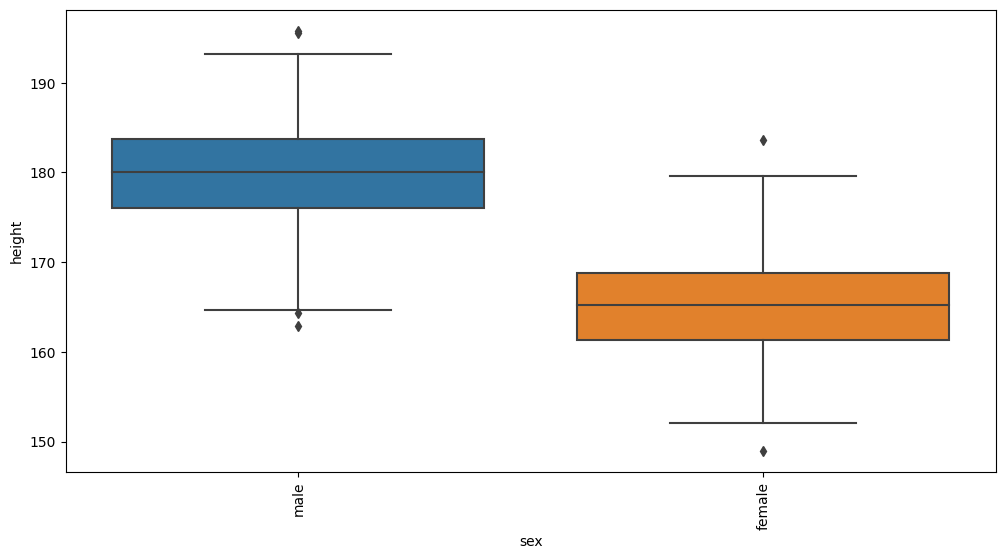

In [9]:
auto.target_analysis(
    train_data = df_train,
    label = 'height',
    fit_distributions = False  ## 반응변수의 값들에 대한 분포가 어느 것에 가까운지를 추측하여 내놓는다. 효용이 적다
)

> 반응변수(target)의 분포, 상관성이 높은 설명변수(features) 요약이 포함되어 있다. 상관계수의 절댓값이 0.5 이상인 열만 산출하기에, 차라리 직접 EDA하는 것이 더 좋을 수 있다.

In [10]:
(pd.get_dummies(df_train, drop_first = True)*1).corr()

,weight,height,sex_male
weight,1.000000,0.936472,0.877617
height,0.936472,1.000000,0.753563
sex_male,0.877617,0.753563,1.000000


<AxesSubplot: >

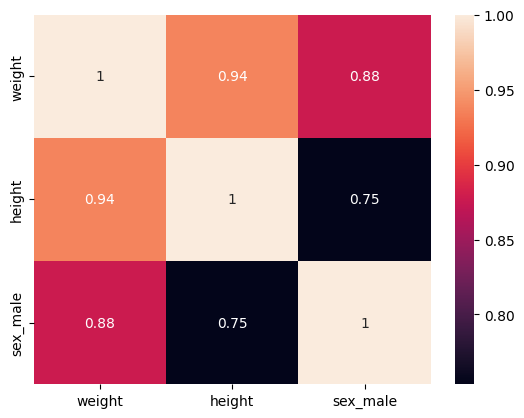

In [11]:
sns.heatmap((pd.get_dummies(df_train, drop_first = True)*1).corr(), annot = True)

> 요런 식으로...

`-` 중요한 설명변수 파악(빠르게 데이터를 파악하기에 용이...!)

No path specified. Models will be saved in: "AutogluonModels/ag-20231219_132849"


### Model Prediction for height

Using validation data for `Test` points

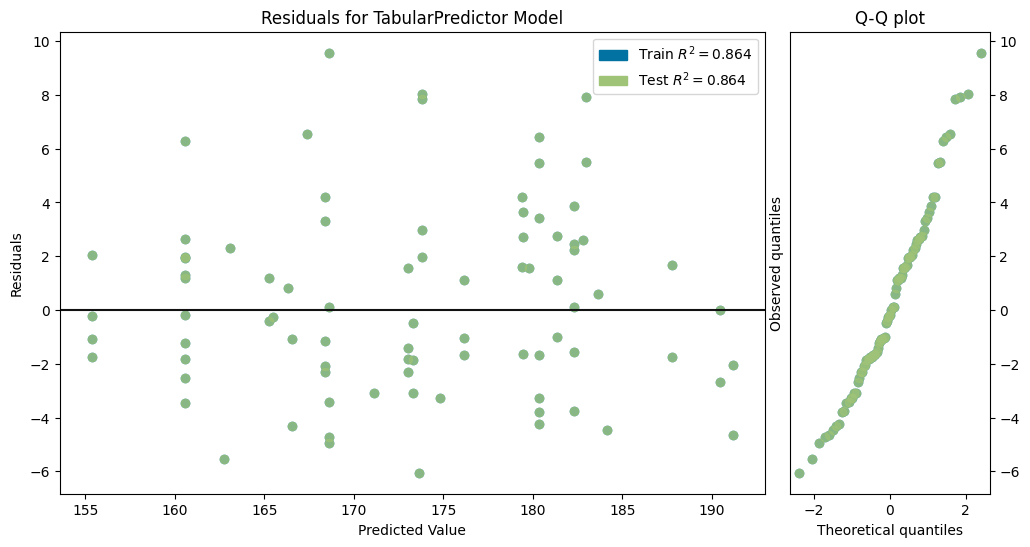

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,eval_metric
0,LightGBMXT,-3.441217,-3.881789,0.006675,0.002764,25.229607,0.006675,0.002764,25.229607,1,True,1,root_mean_squared_error


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
weight,9.433162,0.468715,7.290537e-07,5,10.398253,8.468071
sex,1.710680,0.464422,5.924364e-04,5,2.666932,0.754427


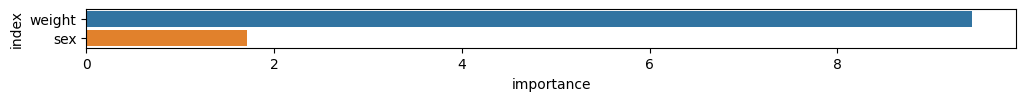

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,weight,sex,height,height_pred,error
208,NaN,female,159.027430,168.600342,9.572911
263,54.145913,female,165.791300,173.811340,8.020041
146,76.642564,male,175.011295,182.954391,7.943097
228,56.473758,female,165.962051,173.811340,7.849289
92,51.018586,female,160.851952,167.398270,6.546318
198,NaN,male,173.915293,180.355164,6.439870
157,46.214566,female,154.289882,160.576065,6.286183
106,69.667856,male,179.665916,173.611328,6.054588
118,48.711791,female,168.305739,162.763138,5.542602
166,77.068343,male,177.439194,182.954391,5.515197


In [12]:
auto.quick_fit(
    train_data = df_train,
    label = 'height',
    show_feature_importance_barplots = True  ## 설명변수 간 중요도를 간단히 시각화할 수 있음.
)

> LightGBMXT로 빠르게 적합한 후, 잔차도와 설명변수 중요도를 추려준다. 잔차가 크거나 모호한 관측치를 나열해주기도 한다.

`-` 관측치 별 해석

* 0번 observation

In [13]:
df_train.iloc[[0]]

,weight,sex,height
0,71.169041,male,180.906857


In [14]:
predictr.predict(df_train.iloc[[0]])

0    178.642868
Name: height, dtype: float32

> 왜 해당 값으로 예측했어???

,weight,sex,height
0,71.169041,male,180.906857


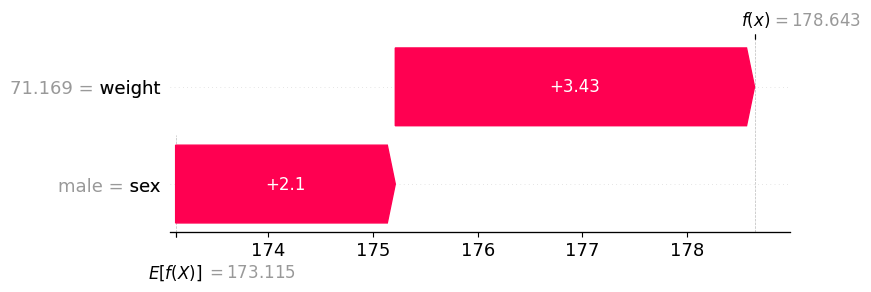

In [15]:
auto.explain_rows(
    train_data = df_train,
    model = predictr,
    rows = df_train.iloc[[0]],
    display_rows = True,
    plot = 'waterfall'
)

> 일단은 평균값인 173.115에 적합
>
> `sex`를 고려하여 +2.1
>
> `weight`을 고려하여 +3.77

따라서 최종적으로 178.643.

* 208번 observation

In [16]:
df_train.iloc[[208]]

,weight,sex,height
208,NaN,female,159.02743


In [17]:
predictr.predict(df_train.iloc[[208]])

208    168.788971
Name: height, dtype: float32

> 어라? 결측치가 있는데 예측이 됐네?

,weight,sex,height
208,NaN,female,159.02743


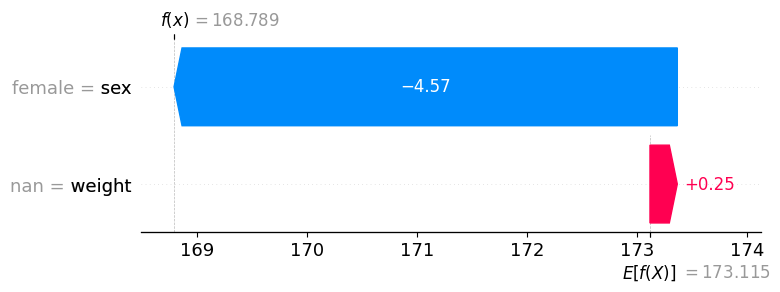

In [18]:
auto.explain_rows(
    train_data = df_train,
    model = predictr,
    rows = df_train.iloc[[208]],
    display_rows = True,
    plot = 'waterfall'
)

> `NaN`값이 들어있음에도 평균으로 예측하는 것이 아닌 특정 값을 더해준다.

**결측치를 하나의 관측치로 해석하여 적합**

<span style="color:gray">트리에서 결측치인가? 아닌가?라는 노드가 존재한다고 보면 된다.</span>

## 3. 이상치가 있는 데이터

### **A. 데이터 EDA**
---




In [19]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:100,3].to_numpy()
temp.sort()
ice_sales = 10 + temp * 0.5 + np.random.randn(100)
ice_sales[0] = 50
df_train = pd.DataFrame({'temp':temp,'ice_sales':ice_sales})
df_train

,temp,ice_sales
0,-4.1,50.000000
1,-3.7,9.234175
2,-3.0,9.642778
3,-1.3,9.657894
4,-0.5,9.987787
...,...,...
95,12.4,17.508688
96,13.4,17.105376
97,14.7,17.164930
98,15.0,18.555388


<AxesSubplot: xlabel='temp', ylabel='ice_sales'>

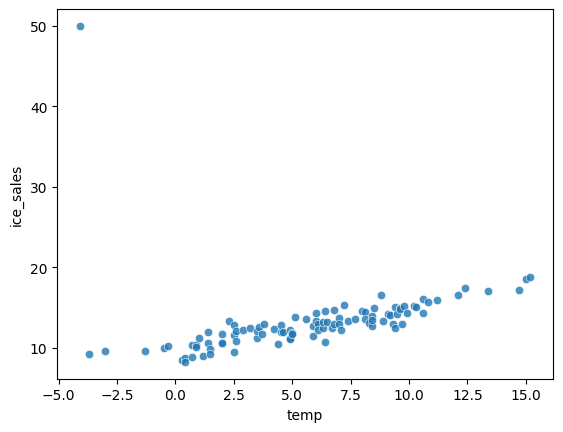

In [20]:
sns.scatterplot(df_train, x = 'temp', y = 'ice_sales', alpha = 0.8)

> 낮은 온도에서 이상치가 존재하는 데이터이다.

### **B. 적합**
---




`-` 오늘도 정말 단순한 오토글루온 적합...

In [21]:
predictr = TabularPredictor(label = 'ice_sales')
predictr.fit(df_train)
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231219_132918"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231219_132918"
AutoGluon Version:  1.0.0
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   952.33 GB / 1887.51 GB (50.5%)
Train Data Rows:    100
Train Data Columns: 1
Label Column: ice_sales
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (50.0, 8.273155164108418, 13.17881, 4.33788)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatu

<AxesSubplot: xlabel='temp', ylabel='ice_sales'>

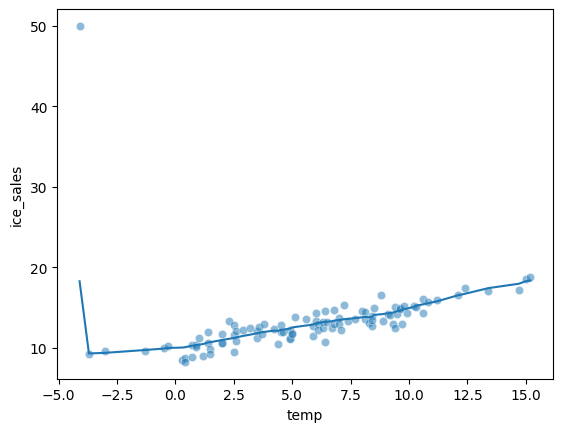

In [22]:
sns.scatterplot(df_train, x = 'temp', y = 'ice_sales', alpha = 0.5)
sns.lineplot(df_train, x = 'temp', y = yhat)

> 잘 했네??

### **C. 해석 및 시각화**
---




`-` y의 분포와 (X, y)의 관계 시각화

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
ice_sales,100,13.178805,4.337878,8.273155,11.296645,12.856589,14.294614,50.0,float64,100,,,float,


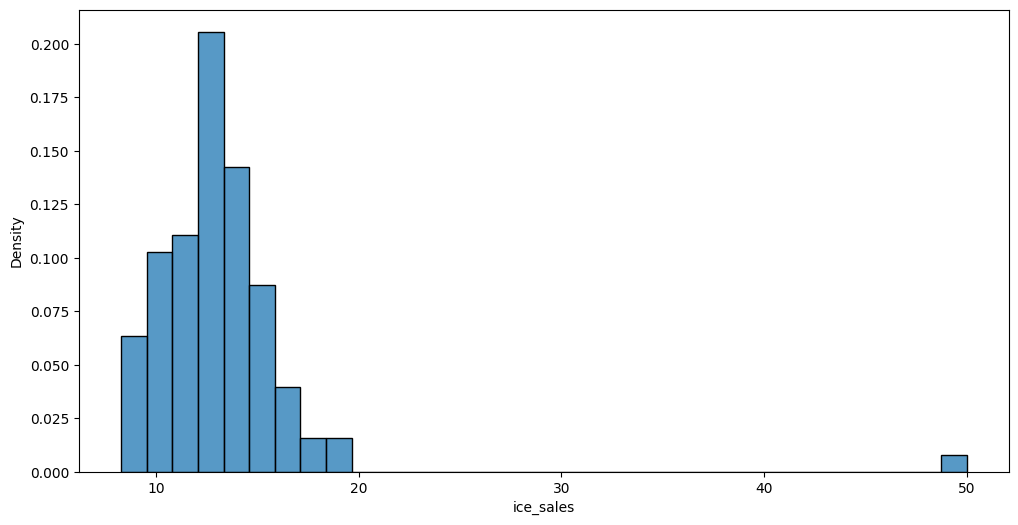

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `ice_sales` >= `0.5`**

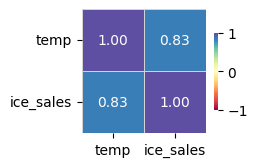

**Feature interaction between `temp`/`ice_sales` in `train_data`**

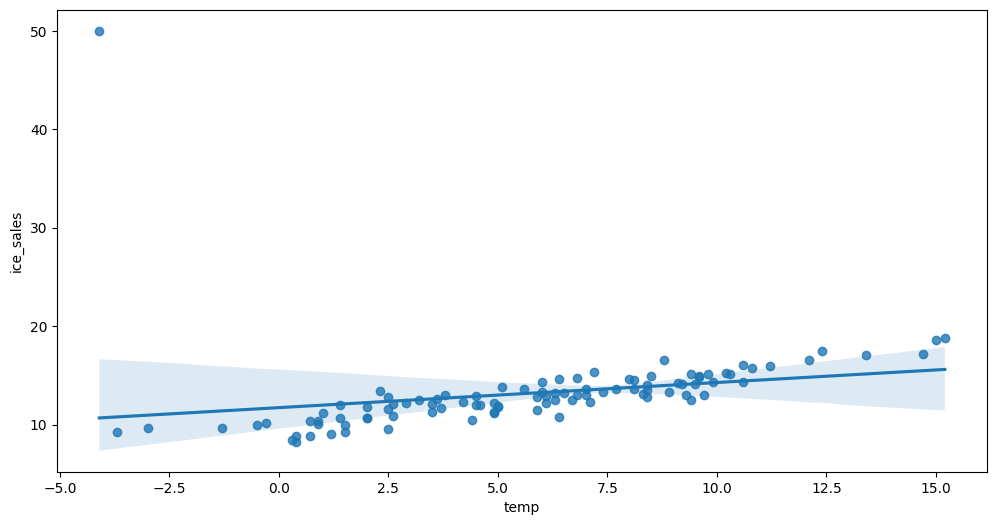

In [23]:
auto.target_analysis(
    train_data = df_train,
    label = 'ice_sales',
    fit_distributions = False
)

`-` 중요한 설명변수...?

In [24]:
## auto.quick_fit()...? 설명변수가 하나예요...

* 설명변수가 하나이므로 생략한다.

`-` 관측치 별 해석

In [25]:
df_train.iloc[[0]]  ## 이상치!

,temp,ice_sales
0,-4.1,50.0


In [26]:
predictr.predict(df_train.iloc[[0]])

0    18.292442
Name: ice_sales, dtype: float32

,temp,ice_sales
0,-4.1,50.0


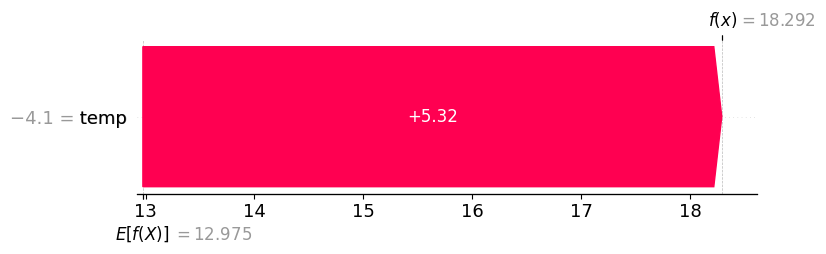

In [27]:
auto.explain_rows(
    train_data = df_train,
    model = predictr,
    rows = df_train.iloc[[0]],
    display_rows = True,
    plot = 'waterfall'
)

> 온도가 -4.1일 때 판매량의 평균치보다 그 값을 오히려 더해줬다.

## 4. 쓸모없는 정보가 있을 때(오버피팅)

### **A. 데이터**
---




In [28]:
np.random.randn(43052)
n_balance = 10 
toeic = np.random.randint(0,199,size=5000)*5
gpa = np.random.randint(100,450,size=5000)/100
u = toeic * 8/995 + gpa * 10/4.5
u = u - np.mean(u)
v = np.exp(u)/(1+np.exp(u))
employment = np.random.binomial(n=1,p=v)
df = pd.DataFrame({
'toiec':toeic,
'gpa':gpa,
'employment':employment
})
df_balance = pd.DataFrame((np.random.randn(5000,n_balance)).reshape(5000,n_balance)*1,columns = ['balance'+str(i) for i in range(n_balance)]) > 0
df = pd.concat([df,df_balance],axis=1).assign(employment = lambda df: df.employment.map({0:'No',1:'Yes'}))
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)

In [29]:
df_train

,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,95,3.44,No,False,True,False,True,True,False,True,True,False,False
2162,940,3.61,Yes,True,True,False,False,True,False,False,False,True,False
2396,260,2.07,No,False,True,True,True,False,False,False,True,True,False
4768,885,2.63,Yes,False,False,False,True,True,True,True,False,False,False
2271,270,3.75,Yes,True,False,False,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,315,2.52,No,False,False,False,True,True,False,True,True,False,True
466,690,3.97,Yes,True,False,True,True,False,False,True,False,True,False
3092,235,1.04,No,True,True,True,True,False,False,False,False,True,True
3772,900,1.24,Yes,False,True,False,False,True,True,True,False,False,True


### **B. 적합**
---




In [30]:
## step 1 -- pass
## step 2 : create predictor
predictr = TabularPredictor(label = 'employment')
## step 3 : fitting
predictr.fit(df_train)
## step 4 : prediction
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231219_132925"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231219_132925"
AutoGluon Version:  1.0.0
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   952.33 GB / 1887.51 GB (50.5%)
Train Data Rows:    1500
Train Data Columns: 12
Label Column: employment
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['No', 'Yes']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Yes, class 0 = No
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represe

`AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).`

> 알아서 분류 문제로 잘 인식하는 것을 알 수 있다.

### **C. 해석 및 시각화**
---




`-` y의 분포, (X, y)의 관계

## Target variable analysis

,count,unique,top,freq,dtypes,missing_count,missing_ratio,raw_type,special_types
employment,1500,2,No,757,object,,,object,


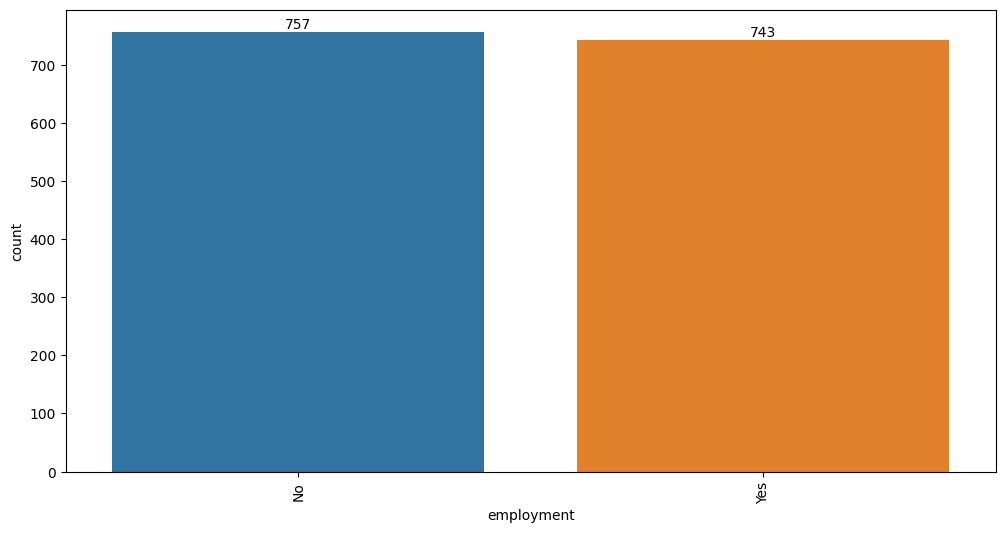

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `employment` >= `0.5`**

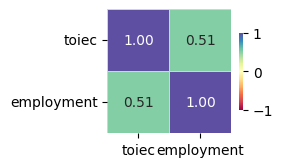

**Feature interaction between `toiec`/`employment` in `train_data`**

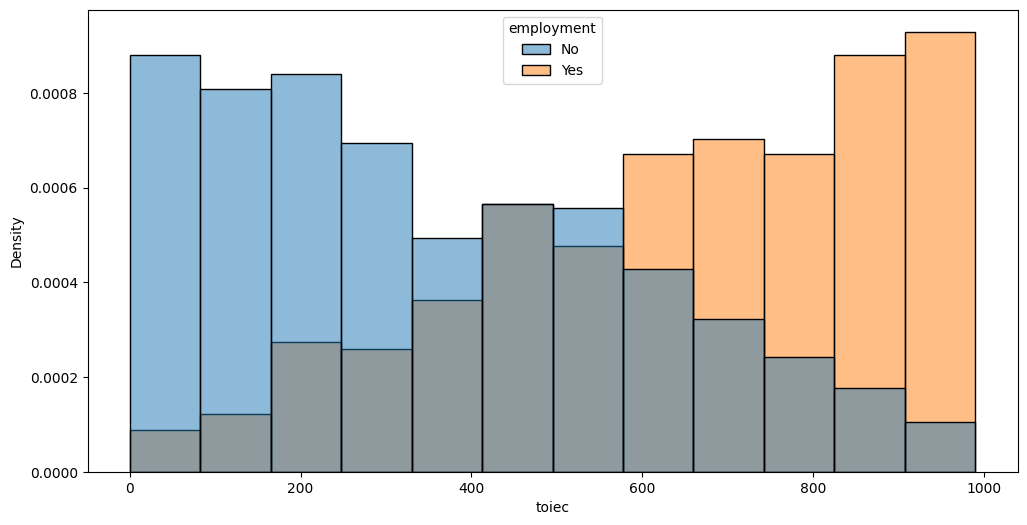

In [31]:
auto.target_analysis(
    train_data = df_train,
    label = 'employment',
    fit_distributions = False
)

> 마지막 히스토그램을 보면 토익 점수가 높아질수록 취업된 사람의 수가 많아짐을 알 수 있다. (낮을수록 취업 안된 사람도 많아지고 있음.)

`-` 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231219_132946"


### Model Prediction for employment

Using validation data for `Test` points

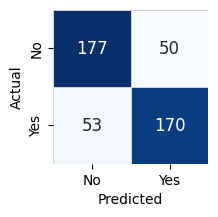

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,eval_metric
0,LightGBMXT,0.771111,0.82381,0.00093,0.002314,1.767422,0.00093,0.002314,1.767422,1,True,1,accuracy


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
toiec,0.156000,0.020452,0.000035,5,0.198110,0.113890
gpa,0.130222,0.023706,0.000126,5,0.179033,0.081411
balance7,0.004000,0.002897,0.018341,5,0.009966,-0.001966
balance5,-0.001333,0.001217,0.964758,5,0.001173,-0.003839
balance0,-0.001778,0.001859,0.950350,5,0.002050,-0.005606
balance3,-0.006222,0.002434,0.997682,5,-0.001210,-0.011235
balance4,-0.008444,0.002897,0.998569,5,-0.002479,-0.014410
balance8,-0.008444,0.003651,0.996677,5,-0.000926,-0.015963
balance6,-0.008889,0.005666,0.987644,5,0.002777,-0.020554
balance2,-0.009333,0.006921,0.980330,5,0.004917,-0.023584


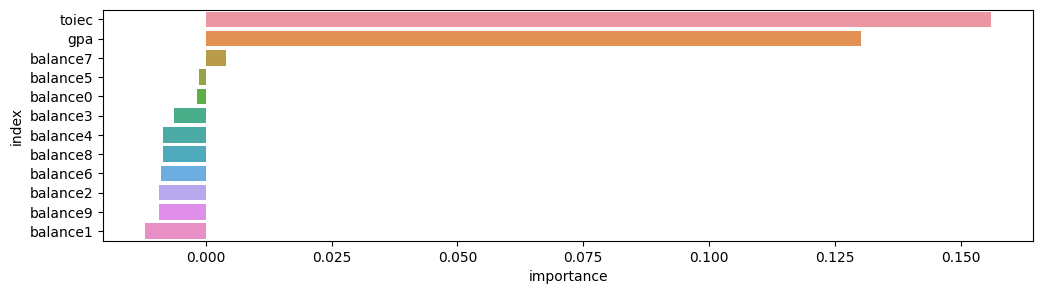

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,toiec,gpa,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9,employment,No,Yes,error
2923,280,2.08,False,False,True,True,False,True,True,False,False,False,Yes,0.651537,0.348463,0.303075
431,325,2.42,False,False,False,True,True,False,False,True,False,False,Yes,0.638116,0.361884,0.276231
2082,605,4.39,True,False,False,True,True,False,True,True,True,False,No,0.364448,0.635552,0.271105
609,450,4.31,False,True,False,False,True,False,False,True,True,False,No,0.374384,0.625616,0.251232
2568,920,2.65,False,True,False,True,False,True,False,True,True,True,No,0.385493,0.614507,0.229015
2300,635,1.68,False,False,False,True,False,False,True,False,False,False,Yes,0.614377,0.385623,0.228754
3297,670,1.64,True,True,False,False,False,True,True,False,False,False,Yes,0.613320,0.386680,0.226640
3763,840,2.85,False,False,False,False,False,True,False,False,False,True,No,0.389110,0.610890,0.221781
1976,550,1.14,True,False,False,True,False,True,True,True,True,True,Yes,0.604432,0.395568,0.208864
3120,960,2.09,True,True,True,True,False,False,True,True,False,False,No,0.397658,0.602342,0.204683


### Rows with the least distance vs other class

Rows in this category are the closest to the decision boundary vs the other class and are good candidates for additional labeling

,toiec,gpa,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9,employment,No,Yes,error
3771,795,1.20,True,True,True,False,True,True,False,True,True,True,No,0.497162,0.502838,0.005676
3514,320,3.24,True,False,False,True,True,True,True,False,True,True,No,0.497108,0.502892,0.005785
1528,735,2.56,True,False,False,True,True,True,True,True,True,True,Yes,0.505860,0.494140,0.011719
3594,200,4.16,True,False,True,False,False,True,False,True,False,False,No,0.493261,0.506739,0.013478
1085,250,3.80,True,True,True,True,True,False,False,False,False,False,No,0.492851,0.507149,0.014297
1806,320,3.30,True,False,True,True,False,True,False,True,True,True,No,0.492619,0.507381,0.014762
1857,215,3.58,True,False,True,False,False,True,False,False,False,False,Yes,0.507723,0.492277,0.015447
3104,425,3.12,True,False,False,True,True,True,False,False,False,False,No,0.492062,0.507938,0.015876
127,245,3.20,True,False,False,True,True,True,False,False,True,True,No,0.491922,0.508078,0.016156
1604,200,3.70,False,False,False,False,False,False,True,True,True,False,Yes,0.508960,0.491040,0.017921


In [32]:
auto.quick_fit(
    train_data = df_train,
    label = 'employment',
    show_feature_importance_barplots = True
)

> 토익과 gpa가 가장 중요하고, 쓸모없는 변수들의 중요도는 떨어지는 것을 파악할 수 있다.
>
> 분류하기 애매한 관측치(각 확률이 0.5에 가까움)가 따로 표기된다.

`-` 관측치 별 해석

* 0번 관측치

In [33]:
df_train.iloc[[0]]

,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,95,3.44,No,False,True,False,True,True,False,True,True,False,False


In [34]:
predictr.predict(df_train.iloc[[0]])  ## 여긴 왜 굳이 안곱해줘도 될까.

4431    No
Name: employment, dtype: object

,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,95,3.44,No,0,1,0,1,1,0,1,1,0,0


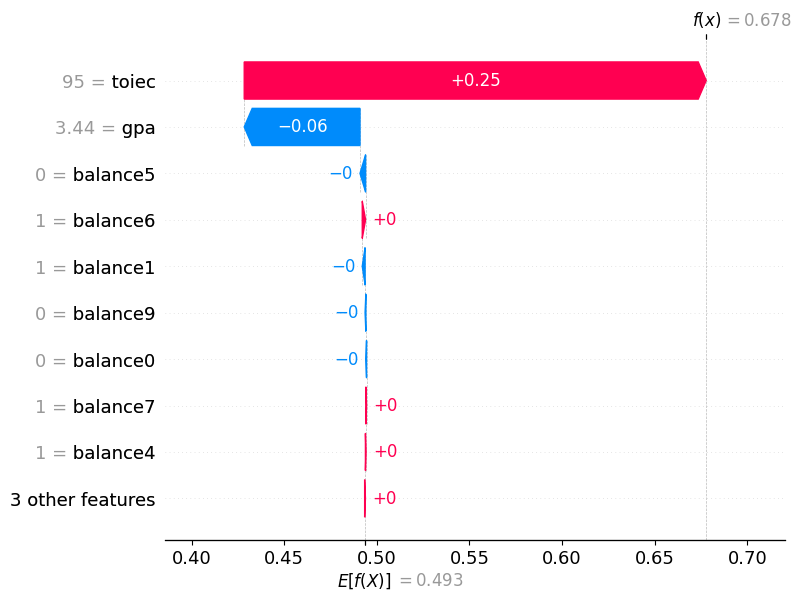

In [35]:
auto.explain_rows(
    train_data = df_train,
    model = predictr,
    rows = df_train.iloc[[0]]*1,  ## 자료형이 bool로 들어가 있을 경우 1을 곱해줘야 한다.
    display_rows = True,
    plot = 'waterfall'
)